In [350]:
model = word2vec.Word2Vec.load("./latest-ja-word2vec-gensim-model/word2vec.gensim.model")

In [1002]:
#coding: UTF-8
from requests_oauthlib import OAuth1Session
import json
import twitkey
import requests
import sys, urllib
import os.path
import time
from wordcloud import WordCloud
import numpy as np

twitter = OAuth1Session(twitkey.twkey["CONSUMER_KEY"], twitkey.twkey["CONSUMER_SECRET"], twitkey.twkey["ACCESS_TOKEN"], twitkey.twkey["ACCESS_TOKEN_SECRET"])
#別ファイルtwitkey.pyから必要な各パラメータ値を参照します。
print(twitter)

uid = "3_syouktaro"
response=twitter.get(
     f'https://api.twitter.com/1.1/statuses/user_timeline.json?user_id={uid}')
res = response.text

res = json.dumps(res, indent=2)

In [1003]:
import glob
import MeCab
import pandas as pd
from janome.tokenizer import Tokenizer
from gensim.models import word2vec

In [1004]:
import time

# tweetデータの分かち書き/ベクトル取得

In [1013]:
df["words"] = ""
for index, row in df.iterrows():
    wakati_result = wakati(row[df.columns.get_loc("tweet")])
    df.at[index, "words"] = wakati_result

In [1014]:
df.head()

,tweet,id,words
0,社会人経験のない私が初めて社会人になった一日でした また公開したらお知らせします！,1180102824685780992,"[社会, 人, 経験, の, ない, 私, が, 初めて, 社会, 人, に, なる, た,..."
2,今日はとある撮影でした,1180076895699795968,"[今日, は, とある, 撮影, です, た]"
7,ここお化け屋敷みたいになっててメニューも面白いです🙆‍♀️,1179417914430103562,"[ここ, お化け, 屋敷, みたい, に, なる, てる, て, メニュー, も, 面白い,..."
12,シメのお茶漬けを食べてる途中なのにまだ頼もうとする食太郎,1179398011165827072,"[シメ, の, お茶漬け, を, 食べる, てる, 途中, だ, のに, まだ, 頼む, う..."
13,今日撮影した動画、 前回の宅撮り動画の画角が微妙だったから色々模索した結果、モッパンみたいな...,1179356611137212417,"[今日, 撮影, する, た, 動画, 、, , 前回, の, 宅, 撮る, 動画, の,..."


In [1015]:
def wakati(sentence):
    t = Tokenizer()
    words = []
    for token in t.tokenize(sentence, stream=True):
        words.append(token.base_form)
    return words

def getVector(words):
    tweet_vec = [0] * 50
    error = 0
    for word in words:
        try:
            tweet_vec += model.wv[word]
        except:
            error += 1
    try:
        tweet_vec = tweet_vec/len(words)
    except:
        error += 1
    return tweet_vec

In [1016]:
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [1017]:
lyrics_dir_list = glob.glob('./lyrics/*.txt')

In [1018]:
df["vec"] = ""
for index, row in df.iterrows():
    df.at[index, "vec"] = getVector(row[df.columns.get_loc("words")])

# 歌詞の分かち書き/ベクトル取得

In [1019]:
# lyrics_list = []
# for lyric_dir in lyrics_dir_list:
#     f = open(lyric_dir)
#     data1 = f.read()  # ファイル終端まで全て読んだデータを返す
#     f.close()
#     data1 = data1.replace("\n", " ")
#     lyrics_list.append(data1)
# #     lines1 = data1.split('\n') # 改行で区切る(改行文字そのものは戻り値のデータには含まれない)
# #     print(type(lines1))
# #     for line in lines1:
# #         print(line)

In [1020]:
df_song = pd.read_csv("./lyrics.csv")

In [1021]:
df_song = df_song.rename(columns = {"song":"song_name","lyrics":"lyric", "word":"words"})

In [1022]:

df_song["words"] = ""
for index, row in df_song.iterrows():
    wakati_result = wakati(row[df_song.columns.get_loc("lyric")])
    df_song.at[index, "words"] = wakati_result
    
df_song["vec"] = ""
for index, row in df_song.iterrows():
    df_song.at[index, "vec"] = getVector(row[df_song.columns.get_loc("words")])

In [1023]:
df_song

,Unnamed: 0,song_name,lyric,words,vec
0,0,From Zero,わたしの時間はずっと止まっていたんです あなたが優しく溶かしてくれるまで 未来のことは笑...,"[わたし, の, 時間, は, ずっと, 止まる, て, いる, た, ん, です, ,...","[0.025897647622220504, 0.026424219022290064, 0..."
1,1,Home Sweet Home,1日ゴロゴロパソコン開いて 君のタイムラインにツイート並べて ダラダラしてたいのずっと でも...,"[1, 日, ゴロゴロ, パソコン, 開く, て, , 君, の, タイム, ライン, に...","[0.014442443654946142, 0.005117675288196254, 0..."
2,2,ガチで恋するお前らへ,愛されたい 愛したい そう思って生きてきた 100円入れて コンティニュー...,"[愛す, れる, たい, , 愛す, たい, , そう, 思う, て, 生きる, て...","[0.019695966599886535, -0.014241084673237626, ..."
3,3,Daydream,くり返す毎日 同じばっかでやだよ 土日はずっと寝腐って マンデーブルーさ 今年こそはキミと...,"[くり, 返す, 毎日, , 同じ, ばっか, だ, や, だ, よ, , 土日, は,...","[0.02401585539640062, -0.013601791359904098, 0..."
4,4,Chocolate Adventure,まるさんかくしかくにほし 色とりどりに輝くチョコレートを 探すための冒険に出ようか 酸いも...,"[まるい, さ, ん, かく, しかく, に, ほす, , 色とりどり, に, 輝く, チ...","[0.01229509499804584, -0.010986386253707962, 0..."
5,5,くいしんぼハッカー,はあ〜、おなかすいた〜 むむっ、あんなところに おしゃカヘだ パヘたべたい！ あ〜〜パヘたべ...,"[はあ, 〜, 、, おなか, すく, た, 〜, , むむっ, 、, あんな, ところ,...","[0.003220348573314137, -0.034010078650708105, ..."
6,6,Night Sky,星降るこの夜空 時よ止まれと永遠を願う あの流星が消える前に もし最後の言葉が 何かを変える...,"[星, 降る, この, 夜空, , 時, よ, 止まる, と, 永遠, を, 願う, ,...","[0.029784465679632766, 0.021497038118541242, 0..."
7,7,Hack you,Hack you! Hack you! H・A・C・K・Y・O・U Hack you! ...,"[Hack, , you, !, , Hack, , you, !, , H, ・...","[0.0155584522888728, -0.033948555853838096, 0...."
8,8,Sweet Dreams,甘くってとろけちゃいそうな アイスクリームをちょうだいな 泣きたくなって逃げたくなった 君を...,"[甘い, て, とろける, ちゃう, そう, だ, , アイスクリーム, を, ちょうだい...","[0.0035413797120921885, -0.016895483953591722,..."


In [1024]:
# songs_name_list = lyrics_dir_list.copy()
# for i in range(len(songs_name)):
#         songs_name_list[i] = songs_name_list[i][9:-4]

# df_song = pd.DataFrame(columns={"song_name", "lyric", "words", "vec"})
# df_song.song_name = songs_name_list
# df_song.lyric = lyrics_list

# df_song["words"] = ""
# for index, row in df_song.iterrows():
#     wakati_result = wakati(row[df_song.columns.get_loc("lyric")])
#     df_song.at[index, "words"] = wakati_result
    
# df_song["vec"] = ""
# for index, row in df_song.iterrows():
#     df_song.at[index, "vec"] = getVector(row[df_song.columns.get_loc("words")])

In [1025]:
df_song

,Unnamed: 0,song_name,lyric,words,vec
0,0,From Zero,わたしの時間はずっと止まっていたんです あなたが優しく溶かしてくれるまで 未来のことは笑...,"[わたし, の, 時間, は, ずっと, 止まる, て, いる, た, ん, です, ,...","[0.025897647622220504, 0.026424219022290064, 0..."
1,1,Home Sweet Home,1日ゴロゴロパソコン開いて 君のタイムラインにツイート並べて ダラダラしてたいのずっと でも...,"[1, 日, ゴロゴロ, パソコン, 開く, て, , 君, の, タイム, ライン, に...","[0.014442443654946142, 0.005117675288196254, 0..."
2,2,ガチで恋するお前らへ,愛されたい 愛したい そう思って生きてきた 100円入れて コンティニュー...,"[愛す, れる, たい, , 愛す, たい, , そう, 思う, て, 生きる, て...","[0.019695966599886535, -0.014241084673237626, ..."
3,3,Daydream,くり返す毎日 同じばっかでやだよ 土日はずっと寝腐って マンデーブルーさ 今年こそはキミと...,"[くり, 返す, 毎日, , 同じ, ばっか, だ, や, だ, よ, , 土日, は,...","[0.02401585539640062, -0.013601791359904098, 0..."
4,4,Chocolate Adventure,まるさんかくしかくにほし 色とりどりに輝くチョコレートを 探すための冒険に出ようか 酸いも...,"[まるい, さ, ん, かく, しかく, に, ほす, , 色とりどり, に, 輝く, チ...","[0.01229509499804584, -0.010986386253707962, 0..."
5,5,くいしんぼハッカー,はあ〜、おなかすいた〜 むむっ、あんなところに おしゃカヘだ パヘたべたい！ あ〜〜パヘたべ...,"[はあ, 〜, 、, おなか, すく, た, 〜, , むむっ, 、, あんな, ところ,...","[0.003220348573314137, -0.034010078650708105, ..."
6,6,Night Sky,星降るこの夜空 時よ止まれと永遠を願う あの流星が消える前に もし最後の言葉が 何かを変える...,"[星, 降る, この, 夜空, , 時, よ, 止まる, と, 永遠, を, 願う, ,...","[0.029784465679632766, 0.021497038118541242, 0..."
7,7,Hack you,Hack you! Hack you! H・A・C・K・Y・O・U Hack you! ...,"[Hack, , you, !, , Hack, , you, !, , H, ・...","[0.0155584522888728, -0.033948555853838096, 0...."
8,8,Sweet Dreams,甘くってとろけちゃいそうな アイスクリームをちょうだいな 泣きたくなって逃げたくなった 君を...,"[甘い, て, とろける, ちゃう, そう, だ, , アイスクリーム, を, ちょうだい...","[0.0035413797120921885, -0.016895483953591722,..."


In [1026]:
df_song.head()

,Unnamed: 0,song_name,lyric,words,vec
0,0,From Zero,わたしの時間はずっと止まっていたんです あなたが優しく溶かしてくれるまで 未来のことは笑...,"[わたし, の, 時間, は, ずっと, 止まる, て, いる, た, ん, です, ,...","[0.025897647622220504, 0.026424219022290064, 0..."
1,1,Home Sweet Home,1日ゴロゴロパソコン開いて 君のタイムラインにツイート並べて ダラダラしてたいのずっと でも...,"[1, 日, ゴロゴロ, パソコン, 開く, て, , 君, の, タイム, ライン, に...","[0.014442443654946142, 0.005117675288196254, 0..."
2,2,ガチで恋するお前らへ,愛されたい 愛したい そう思って生きてきた 100円入れて コンティニュー...,"[愛す, れる, たい, , 愛す, たい, , そう, 思う, て, 生きる, て...","[0.019695966599886535, -0.014241084673237626, ..."
3,3,Daydream,くり返す毎日 同じばっかでやだよ 土日はずっと寝腐って マンデーブルーさ 今年こそはキミと...,"[くり, 返す, 毎日, , 同じ, ばっか, だ, や, だ, よ, , 土日, は,...","[0.02401585539640062, -0.013601791359904098, 0..."
4,4,Chocolate Adventure,まるさんかくしかくにほし 色とりどりに輝くチョコレートを 探すための冒険に出ようか 酸いも...,"[まるい, さ, ん, かく, しかく, に, ほす, , 色とりどり, に, 輝く, チ...","[0.01229509499804584, -0.010986386253707962, 0..."


In [1027]:
df

,tweet,id,words,vec
0,社会人経験のない私が初めて社会人になった一日でした また公開したらお知らせします！,1180102824685780992,"[社会, 人, 経験, の, ない, 私, が, 初めて, 社会, 人, に, なる, た,...","[-0.008440599060402466, 0.019413520922311224, ..."
2,今日はとある撮影でした,1180076895699795968,"[今日, は, とある, 撮影, です, た]","[0.03788889323671659, 0.07729969546198845, 0.1..."
7,ここお化け屋敷みたいになっててメニューも面白いです🙆‍♀️,1179417914430103562,"[ここ, お化け, 屋敷, みたい, に, なる, てる, て, メニュー, も, 面白い,...","[0.0005040538807710011, -0.021102825986842315,..."
12,シメのお茶漬けを食べてる途中なのにまだ頼もうとする食太郎,1179398011165827072,"[シメ, の, お茶漬け, を, 食べる, てる, 途中, だ, のに, まだ, 頼む, う...","[0.01221646653721109, -0.01834698347374797, 0...."
13,今日撮影した動画、 前回の宅撮り動画の画角が微妙だったから色々模索した結果、モッパンみたいな...,1179356611137212417,"[今日, 撮影, する, た, 動画, 、, , 前回, の, 宅, 撮る, 動画, の,...","[0.013533330899441526, 0.038285453826011645, 0..."
...,...,...,...,...
1133,見てるだけでも楽しめる😂,1165039553989627905,"[見る, てる, だけ, でも, 楽しめる, 😂]","[0.04803086712490767, 0.047283698339015245, 0...."
1144,今日お祭りで食べ歩きの撮影あるから控えます 今から夕方の撮影までの間に我慢して5キロ痩せます,1164979020645093376,"[今日, お祭り, で, 食べる, 歩き, の, 撮影, ある, から, 控える, ます, ...","[0.02545857323067529, 0.09407259996182152, 0.0..."
1145,めっちゃおにぎり食べたい,1164978487490297856,"[めっちゃ, おにぎり, 食べる, たい]","[-0.03352185833500698, -0.11277600564062595, 0..."
1152,先日お仕事で話題のタピオカランドに行きました タピオカは美味しくて天才,1164891786822553600,"[先日, お, 仕事, で, 話題, の, タピオカ, ランド, に, 行く, ます, た,...","[-0.021538208549221356, -0.005619289146529304,..."


# tweetごとに、類似度の高い歌詞を計算

In [1028]:
df["song"] = ""
df["score"] = ""

for index, row in df.iterrows():
    vec_tweet = row[df.columns.get_loc("vec")]

    vec_song = df_song.vec.tolist()

    score_list = []
    for vec in vec_song:
        score_list.append(cos_sim(vec,vec_tweet))
    df.at[index, "song"] = df_song.at[score_list.index(max(score_list)), "song_name"]
#     df.at[index, "score"] = max(score_list)
    try:
        df.at[index, "score"] = str(max(score_list))
    except:
        error = 1
df.score = df.score.astype("float")

c:\users\sera\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [1029]:
df.song.value_counts()

Home Sweet Home        120
ガチで恋するお前らへ              66
Hack you                60
くいしんぼハッカー               60
Daydream                48
Chocolate Adventure     42
Night Sky               36
From Zero               30
Name: song, dtype: int64

In [1030]:
df_result = df.song.value_counts().reset_index()

result = df_result.at[0, "index"]

In [1031]:
result

'Home Sweet Home'

# 要因をみてみる

In [1032]:
df_save = df.copy()

In [1033]:
df = df_save.copy()

In [1034]:
df = df.drop_duplicates(subset="id")

In [1035]:
df = df.sort_values("score", ascending=False)

In [1036]:
df[df.song == result].reset_index(drop=True).at[0, "tweet"]

'こんな時間にずっとクラップダンスを踊り続けてとても疲れました これからイベントまでに毎日やってがんばります🤱 今日のご飯はこれでした '

In [1037]:
df.song.value_counts(normalize=True).reset_index()

,index,song
0,Home Sweet Home,0.259740
1,ガチで恋するお前らへ,0.142857
2,Hack you,0.129870
3,くいしんぼハッカー,0.129870
4,Daydream,0.103896
5,Chocolate Adventure,0.090909
6,Night Sky,0.077922
7,From Zero,0.064935


In [1038]:
# x, y ... pandas.series

def rader_plot(x, y):
    pi = 3.1415
    
    # number of variable
    plt.figure(figsize=(8,8))

    categories=x.values.tolist()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = [s for s in y.values.tolist()]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]


    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles, categories, color='grey', size=25)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.25, 0.5, 0.75, 1], ["25%","50%","75%","100%"], color="grey", size=7)
    plt.ylim(0,1)
    
    angles.append(angles[0])
    values.append(values[0])

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

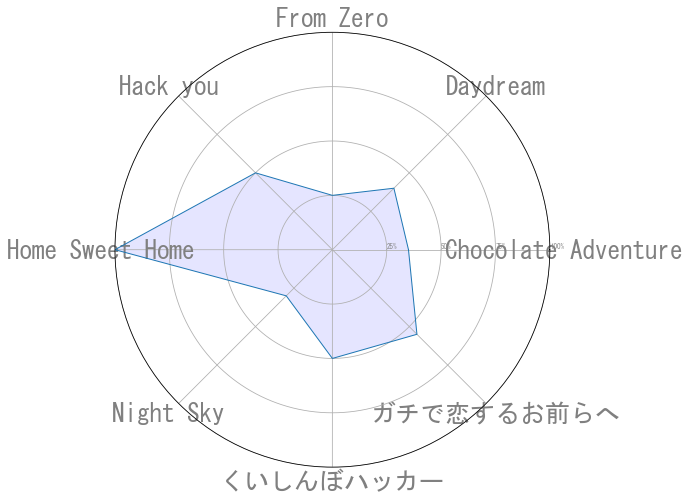

In [1039]:
##多数決で決める
df_score = df.song.value_counts(normalize=True).reset_index()
df_score.song = df_score.song / max(df_score.song)
df_score = df_score.sort_values("index")
rader_plot(df_score["index"], df_score["song"])

In [1040]:
df_score

,index,song
5,Chocolate Adventure,0.35
4,Daydream,0.40
7,From Zero,0.25
2,Hack you,0.50
0,Home Sweet Home,1.00
6,Night Sky,0.30
3,くいしんぼハッカー,0.50
1,ガチで恋するお前らへ,0.55


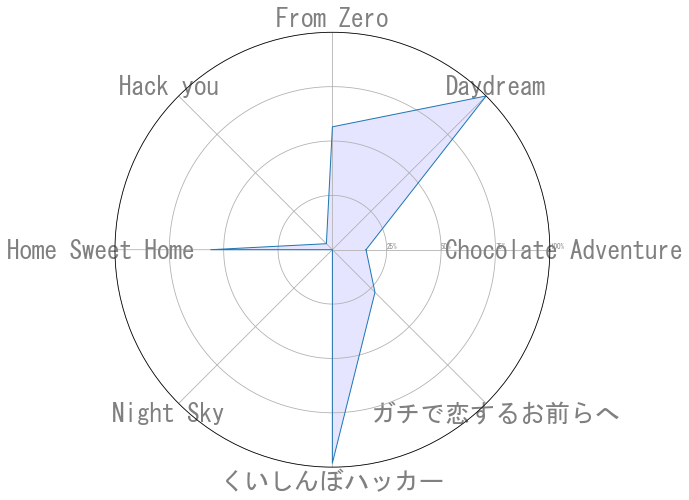

In [1041]:
##groupby mean
from sklearn import preprocessing

df_score = df.groupby('song').mean().reset_index()
df_score["score_std"] = preprocessing.minmax_scale(df_score.score)
rader_plot(df_score["song"], df_score["score_std"])

In [1042]:
from matplotlib import rcParams    
rcParams['font.family']= "MS Gothic"

In [1043]:
df_score["score"]

0    0.705960
1    0.794423
2    0.748919
3    0.693864
4    0.748354
5    0.689773
6    0.792482
7    0.718771
Name: score, dtype: float64

In [1044]:
rader_plot(df_score["index"], df_score["song"])

KeyError: 'index'

# 曲

# wordcloud

In [ ]:
tweet_all = ""
for index, row in df.iterrows():
    tweet_all += row[df.columns.get_loc("tweet")]

In [ ]:
wordcloud = WordCloud(width=480, height=320)

# テキストからワードクラウドを生成する。
wordcloud.generate(tweet_all)

# ファイルに保存する。
wordcloud.to_file('wordcloud.png')

# numpy 配列で取得する。
img = wordcloud.to_array()
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# ひとまず可視化をしてみる

In [ ]:
digits.vec.shape

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn import datasets
# from sklearn.manifold import TSNE

# digits = df_song

# print(digits.vec.shape)
# # (1797, 64)

# print(digits.song_name.shape)
# # (1797,)

# X_reduced = TSNE(n_components=2, random_state=0).fit_transform(digits.vec)

# print(X_reduced.shape)
# # (1797, 2)

# plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=digits.song_name)
# plt.colorbar()
# # <matplotlib.colorbar.Colorbar at 0x7ff21173ee90>

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

vec_list = []
for vecs in df.vec:
    vec_list.append(vecs)
df_vec = pd.DataFrame(vec_list)
pca.fit(df_vec)

# 分析結果を元にデータセットを主成分に変換する
transformed = pca.fit_transform(vec_list)

# 主成分をプロットする
plt.subplot(1, 2, 2)
plt.scatter(transformed[:, 0], transformed[:, 1])
plt.title('principal component')
plt.xlabel('pc1')
plt.ylabel('pc2')

# 主成分の次元ごとの寄与率を出力する
print(pca.explained_variance_ratio_)

# グラフを表示する
plt.show()


In [ ]:
vec_list